# Optimization of burst and tonic firing in thalamo-cortical neurons

____

This notebook illustrates how to **setup** and **configure optimisations** presented in the following paper:

Iavarone, Elisabetta, Jane Yi, Ying Shi, Bas-Jan Zandt, Christian O'reilly, Werner Van Geit, Christian Rössert, Henry Markram, and Sean L. Lewis Hill. "Experimentally-constrained biophysical models of tonic and burst firing modes in thalamocortical neurons." [BioRxiv (2019): 512269](https://www.biorxiv.org/content/10.1101/512269v3).

Author of this script: Elisabetta Iavarone @ Blue Brain Project

The models were constrained by using the **experimental data** from Jane Yi, Ying Shi and Henry Markram at the [LNMC, EPFL](https://www.epfl.ch/labs/markram-lab/).
_____

This notebook makes use of scripts to automatically setup the optimisation, stored in the *config* and *setup* subfolders. To learn more about concepts such as *mechanisms*, *cell template*, *cell evaluator*, we suggest to go through the [L5PC example](https://github.com/BlueBrain/BluePyOpt/blob/master/examples/l5pc/L5PC.ipynb).
_____

**If you use methods or data presented in this notebook we ask to cite the following publications:**

Iavarone, Elisabetta, Jane Yi, Ying Shi, Bas-Jan Zandt, Christian O'reilly, Werner Van Geit, Christian Rössert, Henry Markram, and Sean L. Hill. "Experimentally-constrained biophysical models of tonic and burst firing modes in thalamocortical neurons." [BioRxiv (2019): 512269](https://www.biorxiv.org/content/10.1101/512269v3).

Van Geit, W., Gevaert, M., Chindemi, G., Rössert, C., Courcol, J. D., Muller, E. B., ... & Markram, H. (2016). BluePyOpt: leveraging open source software and cloud infrastructure to optimise model parameters in neuroscience. [Frontiers in neuroinformatics, 10, 17](https://www.frontiersin.org/articles/10.3389/fninf.2016.00017/full).

___


**If you re-use any file from the *mechanisms* folder you should also cite the associated publication.**

See license file for details.

___

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import bluepyopt
import os

import pprint
pp = pprint.PrettyPrinter(indent=2)

## Set up the cell model and the cell evaluator

A cell evaluator can be easily created by specifing the desired electrical type (e-type).

A cell model is part of the cell evaluator and it built by specifying a **morphology**, **mechanisms**, i.e. the ion channel models and the **bounds for the parameter values** (i.e. the densities of the ion channels)

cAD_ltb:
  morphology:
    morphologies/jy160728_A_idA.asc
  mechanisms:
    pas.all: pas at ['all']
    TC_cad.all: TC_cad at ['all']
    TC_ih_Bud97.somatic: TC_ih_Bud97 at ['somatic']
    TC_Nap_Et2.somatic: TC_Nap_Et2 at ['somatic']
    TC_iA.somatic: TC_iA at ['somatic']
    TC_iL.somatic: TC_iL at ['somatic']
    SK_E2.somatic: SK_E2 at ['somatic']
    TC_HH.somatic: TC_HH at ['somatic']
    TC_ih_Bud97.alldend: TC_ih_Bud97 at ['basal']
    TC_Nap_Et2.alldend: TC_Nap_Et2 at ['basal']
    TC_iA.alldend: TC_iA at ['basal']
    TC_iL.alldend: TC_iL at ['basal']
    SK_E2.alldend: SK_E2 at ['basal']
    TC_HH.alldend: TC_HH at ['basal']
    TC_HH.axonal: TC_HH at ['axonal']
    TC_iT_Des98.somadend: TC_iT_Des98 at ['basal', 'somatic']
  params:
    v_init: v_init = -79
    celsius: celsius = 34
    cm.all: ['all'] cm = 1
    Ra.all: ['all'] Ra = 100
    ena.all: ['all'] ena = 50
    ek.all: ['all'] ek = -90
    e_pas.all: ['all'] e_pas = -80
    g_pas.all: ['all'] g_pas = [1e-06, 0.0

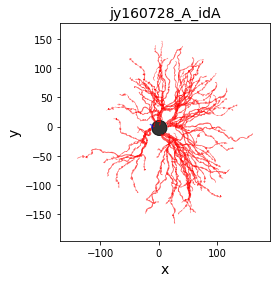

In [3]:
# Import scripts for setting up the cell model and cell evaluator
import CellEvalSetup 

# Library to visualize and analyse morphologies 
import neurom
import neurom.viewer

etype = "cAD_ltb" # or cNAD_ltb 

evaluator = CellEvalSetup.evaluator.create(etype)

neurom.viewer.draw(neurom.load_neuron(evaluator.cell_model.morphology.morphology_path))
print(evaluator.cell_model)

## Run an optimisation

Once we have created the cell evaluator, we can run an optimisation. During the optimisation different parameter values will be evaluated, by running different **stimulation protocols** and recording the **voltage responses** of the models. 

The algorithm will try minimise the difference between the **electrical features** measured from the voltage responses in the model and the features extracted from the experimental data.

In [4]:
seed = 0 # Number to initialize the pseudorandom number generator

opt = bluepyopt.optimisations.DEAPOptimisation(
    evaluator=evaluator,
    map_function=map, # The map function can be used to parallelize the optimisation
    seed=seed,
    eta=10., mutpb=1.0, cxpb=1.0)


As a proof of concept, we run an optimisation with a small number of individuals (n = 2) and generations (n = 2); this step will require some minutes. Typically this optimisation was run with 100 individual for 100 generations. At the end we obtain the "Hall of Fame", where the first individual is the best model.

Before we create a folder to save the results.

In [5]:
!nrnivmodl mechanisms # Compile NEURON .mod files stored in the "mechanisms" folder

if not os.path.exists('checkpoints'):
    os.mkdir('checkpoints')

final_pop, halloffame, log, hist, = opt.run(max_ngen=2,
        offspring_size=2,
        cp_filename='checkpoints/checkpoint.pkl');

/home/iavarone/BBP/BluePyOpt/examples/vbtc
ls: cannot access 'mechanisms/*.inc': No such file or directory
mechanisms/SK_E2.mod mechanisms/TC_cadecay.mod mechanisms/TC_HH.mod mechanisms/TC_iA.mod mechanisms/TC_Ih_Bud97.mod mechanisms/TC_iL.mod mechanisms/TC_ITGHK_Des98.mod mechanisms/TC_Nap_Et2.mod
SK_E2.mod TC_cadecay.mod TC_HH.mod TC_iA.mod TC_Ih_Bud97.mod TC_iL.mod TC_ITGHK_Des98.mod TC_Nap_Et2.mod
"/home/iavarone/neuron/nrn-0993b3e/share/nrn/libtool"  --mode=compile gcc -DHAVE_CONFIG_H  -I. -I.. -I"/home/iavarone/neuron/nrn-0993b3e/include/nrn" -I"/home/iavarone/neuron/nrn-0993b3e/x86_64/lib"      -g -O2 -c -o mod_func.lo mod_func.c
libtool: compile:  gcc -DHAVE_CONFIG_H -I. -I.. -I/home/iavarone/neuron/nrn-0993b3e/include/nrn -I/home/iavarone/neuron/nrn-0993b3e/x86_64/lib -g -O2 -c mod_func.c  -fPIC -DPIC -o .libs/mod_func.o
"/home/iavarone/neuron/nrn-0993b3e/share/nrn/libtool"  --mode=link gcc -module  -g -O2    -o libnrnmech.la -rpath "/home/iavarone/neuron/nrn-0993b3e/x86_64/li

In [7]:
print("\nExample of one individual resulting from an optimisation run:\n")
print(halloffame[0])


Example of one individual resulting from an optimisation run:

[8.998499050883135e-05, 0.13679678638308826, 0.3777141723621707, 1.007012080683658e-05, 4.3417183545378374e-05, 6.108869734438017e-05, 0.06391077372665288, 0.19332127355415177, 0.09540195531054341, 0.0008653099277716401, 0.001302461551959797, 12.270389578182312, 0.5489249541836715, 1.4041700164018957e-06, 7.197046864039541e-05, 0.00319058833779415, 0.00824844977148233, 0.004008919207391105, 1.1428193144282783e-06, 0.0024678893323266233, 13.146438856898932, 0.2442889214486884]


## Analyse optimisation results

In this section you will see how to run simulations with models obtained after running a full optimisation.


In [8]:
import csv

with open('results/{}_params.csv'.format(etype)) as csvfile:
    rows = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC)
    params = list(rows)

Select one of the models and create the dictionary of parameters.

In [9]:
modid = 62 # Or e.g. 78 for cNAD_ltb model shown in the paper
param_dict = evaluator.param_dict(params[modid])
pp.pprint(param_dict)

{ 'gNap_Et2bar_TC_Nap_Et2.alldend': 7.465371215899886e-05,
  'gNap_Et2bar_TC_Nap_Et2.somatic': 1.3389527019193626e-05,
  'gSK_E2bar_SK_E2.alldend': 0.0002179960911576617,
  'gSK_E2bar_SK_E2.somatic': 0.0012832790164235054,
  'g_pas.all': 3.250567914095199e-05,
  'gamma_TC_cad.alldend': 0.000539506186561177,
  'gamma_TC_cad.somatic': 0.006740122627193884,
  'gh_max_TC_ih_Bud97.alldend': 8.422890384914114e-06,
  'gh_max_TC_ih_Bud97.somatic': 4.7504774088700974e-05,
  'gk_max_TC_HH.alldend': 0.009924383323607554,
  'gk_max_TC_HH.axonal': 0.11490723847692205,
  'gk_max_TC_HH.somatic': 0.11616929624507591,
  'gk_max_TC_iA.alldend': 0.00418186621417919,
  'gk_max_TC_iA.somatic': 0.06374589309943703,
  'gna_max_TC_HH.alldend': 0.005250846661623297,
  'gna_max_TC_HH.axonal': 0.21874510090978222,
  'gna_max_TC_HH.somatic': 0.09113695987409176,
  'pcabar_TC_iL.alldend': 1.1024317581168538e-05,
  'pcabar_TC_iL.somatic': 0.0004981128655248998,
  'pcabar_TC_iT_Des98.somadend': 8.948755951390262e-05

We can run a simulation with the parameters above and the current protocols which are part of the evaluator.

In [10]:
from datetime import datetime

t0 = datetime.now()
responses = evaluator.run_protocols(protocols = evaluator.fitness_protocols.values(), param_values=param_dict)

print("Simulation took {}.".format(datetime.now()-t0))

Simulation took 0:01:58.837763.


We can plot the model responses.

/home/iavarone/.local/lib/python2.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


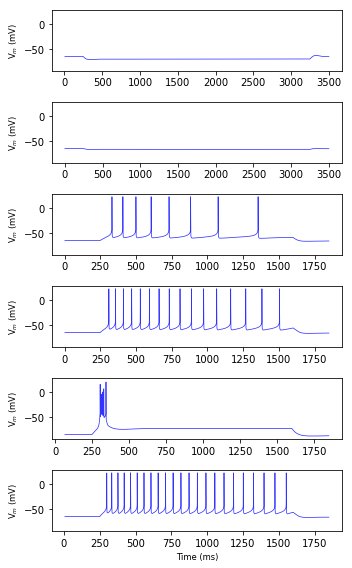

In [11]:
import collections

def plot_responses(responses):
    # Select and sort reponses
    stim_names = [name for name in sorted(evaluator.fitness_protocols.keys()) 
                      if "hold" not in name and "RMP" not in name]
    sel_resp = collections.OrderedDict()
    for name in stim_names:
        sel_resp[name] =  responses["."+name+".soma.v"]
        
    fig, axes = plt.subplots(len(sel_resp), figsize=(5, 8), sharey = True)
    for index, (resp_name, response) in enumerate(sorted(sel_resp.items())):
        
        startid = 550 if "Step" in resp_name or "IV" or "Rin" in resp_name else 0 # Remove initial transient
        indices = response['time'] >= startid
        
        axes[index].plot(response['time'][indices]-startid, response['voltage'][indices],
                        color = "blue", lw = 0.75, alpha = 0.8)
        
        axes[index].set_ylabel('V$_m$ (mV)', fontsize = 'small')
        axes[-1].set_xlabel('Time (ms)', fontsize = 'small')
    fig.tight_layout()
    fig.show()
plot_responses(responses)


We can evaluate the fitness of the model by computing its errors. Each error quantify how much the model deviates from the experimental features.

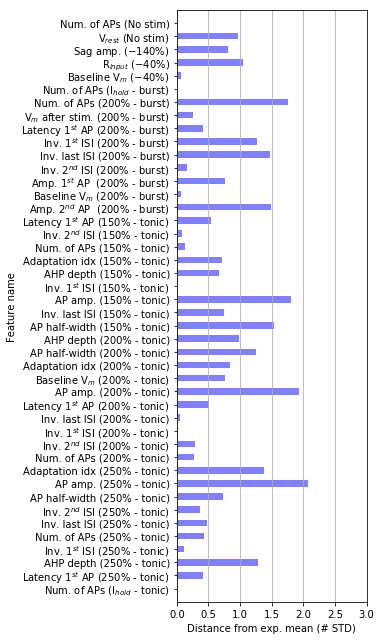

In [12]:
objectives = evaluator.fitness_calculator.calculate_scores(responses)

def plot_objectives(objectives): 
    
    # Names for all the stimuli   
    stim_name = ['RMP', u'IV_-140', u'Rin_dep',  'hold_hyp', u'Step_200_hyp',  u'Step_150', 
             u'Step_200', u'Step_250', 'hold_dep']
    
    # Sort objectives
    obj_keys = [[key for key in objectives.keys() if key.split(".")[1] == stim] for stim in stim_name]
    obj_keys = [item for sublist in obj_keys for item in sublist][::-1] 
    obj_val = []
    for key in obj_keys:
        obj_val.append(objectives[key])
 
    ytick_pos = [x + 0.5 for x in range(len(obj_keys))]
    fig, ax = plt.subplots(figsize = (5.4,9), facecolor = 'white')
  
    ax.barh(ytick_pos,
              obj_val,
              height=0.5,
              align='center',
              color='blue',
              alpha=0.5)
    
    obj_keys = [CellEvalSetup.tools.rename_feat(name) for name in obj_keys]     
        
    ax.set_yticks(ytick_pos)
    ax.set_yticklabels(obj_keys, size='medium')
    ax.set_ylim(-0.5, len(obj_keys) + 0.5)
    ax.set_xlim([0,3])
      
    ax.set_xlabel("Distance from exp. mean (# STD)")
    ax.set_ylabel("Feature name")
    ax.xaxis.grid(True)
    fig.tight_layout()

plot_objectives(objectives)